In [1]:
## Exercise 4a
# 1 Comment on your and other's solution to Exercise 4
# 2 Red Cards Study


In [2]:
# 2.1 Loading and Cleaning the Data (10 points)

import pandas as pd                                    
import numpy as np                             
import os       
import matplotlib.pyplot as plt           
import pickle    
filename=os.path.join('CrowdstormingDataJuly1st.csv') 
df0 = pd.read_csv(filename)
df0.shape


(146028, 28)

In [3]:
df0.head()


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [4]:
df0.columns.values


array(['playerShort', 'player', 'club', 'leagueCountry', 'birthday',
       'height', 'weight', 'position', 'games', 'victories', 'ties',
       'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards',
       'photoID', 'rater1', 'rater2', 'refNum', 'refCountry', 'Alpha_3',
       'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'],
      dtype=object)

In [5]:
# What do the feature names (e.g. column games) stand for?
# games: the number of games in the player-referee dyad
# player–referee dyads including the number of matches players and referees encountered each other 
# the number of red cards given to a player by a particular referee throughout all matches the two encountered each other.


In [6]:
# Which irrelevant features might be dropped?
# birthday, ties, defeats, goals,yellowCards, nIAT, seIAT, nExp, seExp, victories, Alpha_3, photoID(unless want to improve color rating)

irfeature = ['player','birthday','ties','defeats','goals','yellowCards','victories', 'Alpha_3', 'photoID']
df = df0.drop(irfeature, axis=1)
df.shape


(146028, 19)

In [7]:
# What relevant features might be missing, but can be computed?
# Race color: can be computed from rater1 and rater2
# the fraction of games where the player will receive a red card: can be computed
# the fraction of games where the player will receive a red card by a specific referee: can be computed

df['skinCol'] = (df['rater1'] + df['rater2']) / 2
df['TotalredCards'] = df['yellowReds'] + df['redCards']
df['TotalredCardsRefFrac'] = 0

df['TotalredCardsRefFrac'] = df['TotalredCards'] / df['games']
#df['TotalredCardsFrac'] = 0
#players=pd.unique(df['playerShort'].values.ravel())
#for p in players:
#    Nr = np.sum(df[df['playerShort']==p]['TotalredCards'])
#    N = len(df[df['playerShort']==p])
#    df['TotalredCardsFrac'][df['playerShort']==p] = Nr / N



In [8]:
# Are there missing data values (e.g. missing skin color ratings), and how should they be dealt with?
# Yes. Censoring exists in the data (N_skincolor_na = 21407). To overcome the issue, simply removal or imputation works.
#df[['rater1','rater2']].isna().sum()

df['skinCol'].isna().sum()
df = df.dropna()
df.shape


(115457, 22)

In [9]:
# How good are the skin color ratings? Do the raters agree?
# The two raters disagree about player skintone quite often (N_agree = 88365, N=27092). 
# Besidesm censoring data in players photos also leads to missing color ratings.

df['skinColDiff'] = df['rater1'] - df['rater2']
ra = df['rater1'] == df['rater2']
ra.value_counts()


True     88365
False    27092
dtype: int64

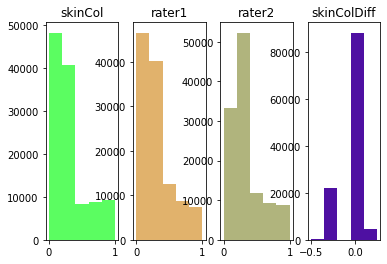

In [10]:
var = ['skinCol','rater1','rater2','skinColDiff']
fig, ax = plt.subplots(1,len(var))

for i in range(len(var)):
    ax[i].hist(df[var[i]], bins = 5, color = np.random.rand(3,))
    ax[i].set_title(var[i])

plt.show()


In [11]:
# Should referees with very few appearances be excluded from the dataset?
# We first calculate the number of appearances of referees and number of referee dyads pair (refCount)

df['refCount']=0

refs=pd.unique(df['refNum'].values.ravel())
#for each ref, count their dyads

for r in refs:
    df['refCount'][df['refNum']==r]= len(df[df['refNum']==r])  

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/youchengzhang/opt/miniconda3/envs/courseFML/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

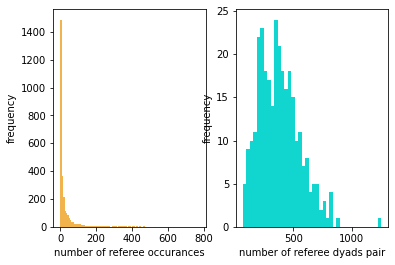

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['refNum'].value_counts(), bins = 100, color = np.random.rand(3,))
ax[0].set_xlabel('number of referee occurances')
ax[0].set_ylabel('frequency')
ax[1].hist(df['refCount'].value_counts(),  bins = 40, color = np.random.rand(3,))
ax[1].set_xlabel('number of referee dyads pair')
ax[1].set_ylabel('frequency')
plt.show()

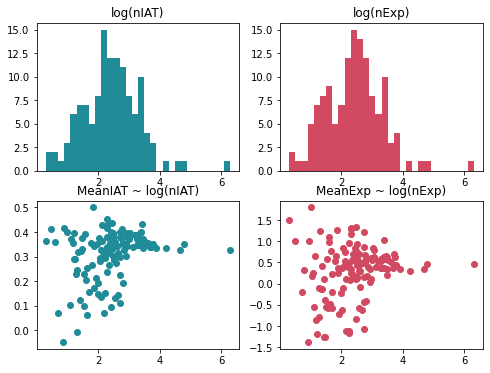

In [13]:
# Check the IAT and Exp statistics
# When the population in a region nIAT and nExp lower than 10^3, 
# meanIAT and meanExp have higher deviations than the countries with nIAT and nExp higher than 10^3.
# Therefore, we remove the data with nIAT and nExp lower than 10^3

fig, ax = plt.subplots(2,2, figsize=(8,6))
c1, c2 = np.random.rand(3,), np.random.rand(3,)
ax[0,0].hist( np.log10(df.drop_duplicates(subset=['nIAT'])['nIAT']) ,bins=30 ,color = c1)
ax[0,0].set_title('log(nIAT)')
ax[0,1].hist( np.log10(df.drop_duplicates(subset=['nExp'])['nExp']) ,bins=30 ,color = c2)
ax[0,1].set_title('log(nExp)')
ax[1,0].scatter(np.log10(df.drop_duplicates(subset=['nIAT'])['nIAT']), df.drop_duplicates(subset=['nIAT'])['meanIAT'], color = c1)
ax[1,0].set_title('MeanIAT ~ log(nIAT)')
ax[1,1].scatter(np.log10(df.drop_duplicates(subset=['nExp'])['nExp']), df.drop_duplicates(subset=['nExp'])['meanExp'], color = c2)
ax[1,1].set_title('MeanExp ~ log(nExp)')
plt.show()
df = df[(df['nIAT'] > 10**3) | (df['nExp'] > 10**3)]


In [14]:
# Should features be normalized and/or centralized?
# Yes. We performed centering on the data. 
# Centerize the data does not really influence the outcome, but more likely to simplify the optimization process.
# Before we center the data, we first convert the categorial variable into one-hot encoding format.
# One-hot encode categorial variables

def OneHotEncoder(df, Var, combined):
    for v in Var:
        ohe = pd.get_dummies(df[v],v)
        if combined == True:
            df = df.drop([v], axis=1)
            df[v]= ohe.values.tolist()
        df = df.drop([v], axis=1)
        df = pd.concat([df, ohe], axis=1)
    return df
# Centering data

def Center(df, Var, excluded=True):
    if excluded == True:
        cVar = [v for v in df.columns.values if v not in Var]
        for v in cVar : 
            df[v] = df[v] - np.mean(df[v])
    else:
        cVar = Var
        for v in cVar : 
            df[v] = df[v] - np.mean(df[v])
    return df


In [15]:
data = df[['TotalredCardsRefFrac','skinCol','club','leagueCountry','height','weight','position','games','refCountry','meanIAT','meanExp']]
cateVar = ['club', 'leagueCountry', 'position', 'refCountry']
data = OneHotEncoder(data, Var=cateVar, combined=False)
data = Center(data, Var=data.columns.values, excluded=False)
data = data.reset_index( drop = True)


In [16]:
X_all = data.drop(['TotalredCardsRefFrac'], axis=1).values
X_all.shape


(97609, 146)

In [17]:
Y_all = data['TotalredCardsRefFrac'].values
Y_all.shape


(97609,)

In [18]:
# 2.2 Model Creation (8 points)
# linear Regression

class LinearRegression:
    def __init__(self):
        self.beta = None
    def train(self, data, labels):
        self.beta, _, _, _ = np.linalg.lstsq(data, labels, rcond=None)
    def predict(self, x):
        self.response = np.dot(x, self.beta.T)
        return self.response   # the predicted fraction of a player receives red cards in total games he has played
# Regression Tree and Regression Forest

class Node:
    pass

class Tree:
    def __init__(self):
        self.root = Node()
    def find_leaf(self, x):
        node = self.root
        while hasattr(node, "feature"):
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

class RegressionTree(Tree):
    def __init__(self):
        super(RegressionTree, self).__init__()
    def train(self, data, labels, n_min=20):
        '''
        data: the feature matrix for all digits
        labels: the corresponding ground-truth responses
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
        D_try = int(np.sqrt(D)) # how many features to consider for each split decision
        # initialize the root node
        self.root.data = data
        self.root.labels = labels
        stack = [self.root]
        while len(stack):
            node = stack.pop()
            n = node.data.shape[0] # number of instances in present node
            if n >= n_min :
                # Call 'make_decision_split_node()' with 'D_try' randomly selected 
                # feature indices. This turns 'node' into a split node
                # and returns the two children, which must be placed on the 'stack'.
                valid_features = np.where(np.min(node.data, axis=0) != np.max(node.data, axis=0))[0]
                feature_indices = np.random.choice(valid_features, size=D_try, replace=False)
                left, right = make_decision_split_node(node=node, feature_indices=feature_indices)
                stack.extend([left,right])
            else:
                # Call 'make_decision_leaf_node()' to turn 'node' into a leaf node.
                make_decision_leaf_node(node=node,minlength=len(set(labels)))
    def predict(self, x):
        leaf = self.find_leaf(x)
        # compute p(y | x)
        #p = leaf.response / leaf.N
        p = leaf.response
        return p

def make_decision_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature 
                     indices to be considered in the present split
    '''
    n, D = node.data.shape
    e_min = float("inf")
    j_min, t_min = None, None
    # find best feature j (among 'feature_indices') and best threshold t for the split
    for j in feature_indices:
        data_unique = np.unique((node.data[:, j]))     # N x 1
        # Compute candidate thresholds
        tj = np.mean([data_unique[:-1],data_unique[1:]], axis=0)     
        # Illustration: for loop - hint: vectorized version is possible
        for t in tj:
            NL = len(node.labels[node.data[:,j] < t])
            NR = len(node.labels[node.data[:,j] > t])
            NLk = node.labels[node.data[:,j] < t]
            NRk = node.labels[node.data[:,j] > t]
            errSEL = sum([(k - sum(NLk)/NL) ** 2 for k in NLk])
            errSER = sum([(k - sum(NRk)/NR) ** 2 for k in NRk])
            # Compute the error
            SE_error = errSEL + errSER
            # choose the best threshold that
            if SE_error < e_min:
                e_min = SE_error
                j_min = j
                t_min = t
    # create children
    left = Node()
    right = Node()
    # initialize 'left' and 'right' with the data subsets and labels
    # according to the optimal split found above
    left.data = node.data[node.data[:,j_min] < t_min,:]
    left.labels = node.labels[node.data[:,j_min] < t_min]
    right.data = node.data[node.data[:,j_min] > t_min,:]
    right.labels = node.labels[node.data[:,j_min] > t_min]
    # turn the current 'node' into a split node
    # (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min
    # return the children (to be placed on the stack)
    return left, right    

def make_decision_leaf_node(node,minlength):
    '''
    node: the node to become a leaf
    '''
    # compute and store leaf response
    node.N = len(node.data)
    #node.response = np.bincount(node.labels,minlength=minlength)
    node.response = sum(node.labels) / node.N

class RegressionForest():
    def __init__(self, n_trees):
        # create ensemble
        self.trees = [RegressionTree() for i in range(n_trees)]
    def train(self, data, labels, n_min=0):
        for tree in self.trees:
            # train each tree, using a bootstrap sample of the data
            bp = np.random.choice(len(data), size=len(data), replace=True)
            bpdata = data[bp,:]
            bplabels = labels[bp,]
            tree.train(data=bpdata, labels=bplabels, n_min=n_min)
    def predict(self, x):
        # compute the ensemble prediction
        #np.bincount(np.array([tr.predict(x) for tr in self.trees])).argmax()
        p = np.mean([tr.predict(x) for tr in self.trees],axis=0)
        return p

def RSFclassifier(X_train,Y_train,X_test,Y_test,n_trees,n_min,return_error):
    DCFclassifier = RegressionForest(n_trees=n_trees) 
    DCFclassifier.train(data=X_train,labels=Y_train,n_min=n_min)
    y_test = [DCFclassifier.predict(X_test[i,:]) for i in range(len(X_test))]
    if return_error == True:
        err =  np.mean((Y_test - y_test) ** 2)           #(len(Y_test) - np.sum(y_test == Y_test)) / len(Y_test)
        return y_test, err
    else:
        return y_test

def LRclassifier(X_train,Y_train,X_test,Y_test,return_error):
    LRclassifier = LinearRegression() 
    LRclassifier.train(data=X_train,labels=Y_train)
    y_test = [LRclassifier.predict(X_test[i,:]) for i in range(len(X_test))]
    if return_error == True:
        err =  np.mean((Y_test - y_test) ** 2)           #(len(Y_test) - np.sum(y_test == Y_test)) / len(Y_test)
        return y_test, err
    else:
        return y_test


In [19]:
# Implement both models and determine their squared test errors by means of cross-validation

from sklearn.model_selection import KFold
import pandas as pd

def evaluateR(X,Y,k,model,n_trees,n_min, filename):
    cv = KFold(n_splits=k, shuffle=True)
    errTx = []
    for train_ind, test_ind in cv.split(Y):
        X_train, Y_train = X[train_ind,:], Y[train_ind,]
        X_test, Y_test = X[test_ind,:], Y[test_ind,]
        #print(np.take(Y_sub,train_index), np.take(Y_sub,test_index))
        if model == LinearRegression:
            yLR, errLR = LRclassifier(X_train,Y_train,X_test,Y_test,return_error=True)
            errT = errLR
            errTx = np.append(errTx, errT)
        elif model == RSFclassifier:
            yRSF, errRSF = RSFclassifier(X_train,Y_train,X_test,Y_test,n_trees=n_trees,n_min=n_min,return_error=True)
            errT = errRSF
            errTx = np.append(errTx, errT)
    # Error 
    df = pd.DataFrame({'Test error':errTx})
    # Store output
    filename = filename
    pickle.dump(df, open(filename, 'wb'))
    # Mean Error and Std
    df = pd.DataFrame({'Test error Mean':[np.mean(errTx)],
                        'Test error Std':[np.std(errTx)] })
    print(df)
    return errTx


In [20]:

errLR = evaluateR(X=X_all,Y=Y_all,k=5,model=LinearRegression,n_trees=None,n_min=None,filename='LR_CV.pkl')

   Test error Mean  Test error Std
0         0.004965        0.000317


In [ ]:

errRSF = evaluateR(X=X_all,Y=Y_all,k=5,model=RSFclassifier,n_trees=5,n_min=100,filename='RSF_CV.pkl')

In [ ]:
# 2.3 Answering the Research Question (6 points)
# Create 19 new training sets where the skin color variable is randomly shuffed among the players
# Each dataset uses a different permutation of skin colors, but keeps all other features and the response intact

def Permutation(df, Var):
    for v in Var:
        df[v] = np.random.permutation(df[v])
    return df


In [ ]:

pVar = ['skinCol']
errPA, errPB = [], []
for _ in range(19):
    datap = Permutation(datap, Var=pVar)

    Yp_all = datap['TotalredCardsRefFrac'].values
    Xp_all = datap.drop(['TotalredCardsRefFrac'], axis=1).values

    errTxA = evaluateR(X=Xp_all,Y=Yp_all,k=5,model=LinearRegression,n_trees=None,n_min=None,filename='cache.pkl')
    errTxB = evaluateR(X=Xp_all,Y=Yp_all,k=5,model=RSFclassifier,n_trees=5,n_min=100,filename='cache.pkl')
    errPA, errPB = np.append(errPA, errTxA), np.append(errPB, errTxB)

# Store permutation output
filename = 'LR_PT.pkl'
pickle.dump(errPA, open(filename, 'wb'))
filename = 'RSF_PT.pkl'
pickle.dump(errPB, open(filename, 'wb'))


In [ ]:

errPA

In [ ]:

errPB

In [ ]:
# 2.4 How to lie with statistics (6 points)
# Remove position variables and Repreprocess the data and 

data2 = df[['TotalredCardsRefFrac','skinCol','club','leagueCountry','height','weight','games','refCountry','meanIAT','meanExp']]
cateVar = ['club', 'leagueCountry', 'refCountry']
data2 = OneHotEncoder(data2, Var=cateVar, combined=False)
data2 = Center(data2, Var=data2.columns.values, excluded=False)
data2 = data2.reset_index( drop = True)

X_all_n = data2p.drop(['TotalredCardsRefFrac'], axis=1).values
Y_all_n = data2p['TotalredCardsRefFrac'].values

In [ ]:

errLR2 = evaluateR(X=X_all_n,Y=Y_all_n,k=5,model=LinearRegression,n_trees=None,n_min=None,filename='LR_CV_lie.pkl')

In [ ]:

errRSF2 = evaluateR(X=X_all_n,Y=Y_all_n,k=5,model=RSFclassifier,n_trees=5,n_min=100,filename='RSF_CV_lie.pkl')

In [ ]:

pVar = ['skinCol']
errPA2, errPB2 = [], []
for _ in range(19):
    data2 = Permutation(data2, Var=pVar)

    Yp_all_n = data2['TotalredCardsRefFrac'].values
    Xp_all_n = data2.drop(['TotalredCardsRefFrac'], axis=1).values

    errTxA = evaluateR(X=Xp_all_n,Y=Yp_all_n,k=5,model=LinearRegression,n_trees=None,n_min=None,filename='cache.pkl')
    errTxB = evaluateR(X=Xp_all_n,Y=Yp_all_n,k=5,model=RSFclassifier,n_trees=5,n_min=100,filename='cache.pkl')
    errPA2, errPB2 = np.append(errPA2, errTxA), np.append(errPB2, errTxB)

# Store permutation output
filename = 'LR_PT_lie.pkl'
pickle.dump(errPA2, open(filename, 'wb'))
filename = 'RSF_PT_lie.pkl'
pickle.dump(errPB2, open(filename, 'wb'))

In [ ]:

errPA2

In [ ]:

errPB2

In [ ]:

# 2.5 Alternative hypotheses (6 points)
# hypotheses 01:  dark colored players tends to play in those positions 
# which have higher chances among all the same colored players to receive RedCards

h1 = df[['playerShort','skinCol','position','TotalredCards']]

h1['PosRedsCount'] = 0

Col = pd.unique(h1['skinCol'].values.ravel())
Var = ['skinCol'+str(i) for i in Col]
for v in Var:
    h1[v] = 0

pos = pd.unique(h1['position'].values.ravel())
for p in pos:
    Nr = np.sum(h1[h1['position']==p]['TotalredCards'])
    h1['PosRedsCount'][h1['position']==p] = Nr

    h1 = h1.drop_duplicates(subset=['playerShort'])

    for s in range(len(Col)):
        Nc = len(h1[h1['position']==p][h1['skinCol']==Col[s]])
        h1[Var[s]][h1['position']==p] = Nc

plt.figure()
plt.bar(h1['position'],h1['PosRedsCount'],color = np.random.rand(3,))
plt.xticks(rotation=90)
plt.show()

In [ ]:

h1_ = h1.drop_duplicates(subset=['position'])
h1_['skinColDark'] = np.sum(h1_[['skinCol0.625','skinCol0.75','skinCol0.875','skinCol1.0']],axis=1)
h1_['skinColLight'] = np.sum(h1_[['skinCol0.0','skinCol0.125','skinCol0.25','skinCol0.375']],axis=1)
h1_['skinColTotal'] = np.sum(h1_[Var],axis=1)
h1_['skinColDark'] = h1_['skinColDark'] / np.sum(np.sum(h1_[['skinCol0.625','skinCol0.75','skinCol0.875','skinCol1.0']],axis=0))
h1_['skinColLight'] = h1_['skinColLight'] / np.sum(np.sum(h1_[['skinCol0.0','skinCol0.125','skinCol0.25','skinCol0.375']],axis=0))

h1_ = h1_[['position','skinColDark','skinColLight']]

plt.figure()
x = np.arange(len(h1_))
plt.bar(x,h1_['skinColDark'],width=0.25,label='Dark',color = 'black')
plt.bar(x+0.25,h1_['skinColLight'],width=0.25,label='Light',color = 'lightgrey')
plt.xticks(x + 0.25 / 2, h1_['position'],rotation=90)
plt.legend()
plt.show()


In [ ]:

# hypotheses 02:  
# referees discriminate against young players /# referees discriminate against countries/leagure players
h2 = df[['playerShort','skinCol','TotalredCards']]
h2['age'] = (pd.to_datetime('01.07.2014') - pd.to_datetime(df0['birthday'], errors='coerce')).astype('<m8[Y]') 

h2['PlayerRedsCount'] = 0
player = pd.unique(h2['playerShort'].values.ravel())
for p in player:
    Nr = np.sum(h2[h2['playerShort']==p]['TotalredCards'])
    h2['PlayerRedsCount'][h2['playerShort']==p] = Nr
h2 = h2.drop_duplicates(subset=['playerShort'])
h2 = h2.dropna()

In [ ]:

h2_ = h2
plt.figure()
plt.bar(h2_['skinCol'],h2_['age'])
plt.scatter(h2_['age'],h2_['PlayerRedsCount'])
plt.scatter(h2_['age'],h2_['skinCol'])


h2_.plot(h2_['skinCol'],h2_['PlayerRedsCount'])